# Density of observations/plots in climate space

This section covers:

- Extract temperature and percipitation data from WorldClim 
- Plotting density in climate space

In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
#from sklearn.metrics import r2_score
from matplotlib.colors import LogNorm, Normalize
import cartopy.crs as ccrs
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import rasterio as rio
from rasterio.plot import show
import geopandas as gpd


ImportError: cannot import name 'pyplot' from 'matplotlib' (unknown location)

In [2]:
# set working directory
os.chdir('/net/home/swolf/iNaturalist/Data')
os.getcwd()

'/net/home/swolf/iNaturalist/Data'

In [3]:
# open files
sPlot = pd.read_csv("sPlotOpen/cwm_loc.csv")

# open file with all iNaturalist observations and trait values
iNat = pd.read_csv("iNat_TRY_log.csv")


/net/home/swolf/.conda/envs/cartopy/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (55) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Convert to geodataframe, so that we can work with the geopandas geometry:

In [4]:
geo_iNat = gpd.GeoDataFrame( iNat.iloc[:,:22], geometry=gpd.points_from_xy(iNat.decimalLongitude, iNat.decimalLatitude), 
                            crs='epsg:4326')

In [5]:
geo_sPlot = gpd.GeoDataFrame(sPlot, geometry=gpd.points_from_xy(sPlot.Longitude, sPlot.Latitude), crs='epsg:4326')

## Extract temperature and percipitation data from WorldClim 

In [6]:
#https://gis.stackexchange.com/questions/317391/python-extract-raster-values-at-point-locations

# Read points from shapefile
clim_sPlot = geo_sPlot
clim_sPlot = clim_sPlot[['Longitude', 'Latitude','PlotObservationID','geometry']]
clim_sPlot.index = range(len(clim_sPlot))
coords = [(x,y) for x, y in zip(clim_sPlot.Longitude, clim_sPlot.Latitude)]


# Open the raster and store metadata
perc = rio.open('WorldClim/wc2.1_2.5m_bio_12.tif')
temp = rio.open('WorldClim/wc2.1_2.5m_bio_1.tif')

# Sample the raster at every point location and store values in DataFrame
clim_sPlot['Perc'] = [x[0] for x in perc.sample(coords)]
clim_sPlot['Temp'] = [x[0] for x in temp.sample(coords)]



/net/home/swolf/.conda/envs/cartopy/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [7]:
# about 15 min

# Read points from shapefile
clim_iNat = iNat[['decimalLongitude', 'decimalLatitude','scientificName', 'eventDate']]
clim_iNat = clim_iNat[clim_iNat['decimalLongitude'].notna()]
clim_iNat = clim_iNat[clim_iNat['decimalLatitude'].notna()]
clim_iNat.index = range(len(clim_iNat))
coords = [(x,y) for x, y in zip(clim_iNat.decimalLongitude, clim_iNat.decimalLatitude)]


# Open the raster and store metadata
perc = rio.open('WorldClim/wc2.1_2.5m_bio_12.tif')
temp = rio.open('WorldClim/wc2.1_2.5m_bio_1.tif')

# Sample the raster at every point location and store values in DataFrame
clim_iNat['Perc'] = [x[0] for x in perc.sample(coords)]
clim_iNat['Temp'] = [x[0] for x in temp.sample(coords)]



In [8]:
clim_iNat.head()

decimalLongitude  decimalLatitude      scientificName            eventDate  \
0        -79.057546        35.987483  Commelina communis  2013-07-07T00:00:00   
1        -75.923660        42.093762  Commelina communis  2021-08-23T13:06:06   
2        -73.933728        40.787636  Commelina communis  2017-09-04T12:47:58   
3        -76.764245        39.643158  Commelina communis  2020-08-26T10:19:56   
4          1.622543        43.109505  Commelina communis  2017-10-21T10:01:00   

     Perc       Temp  
0  1164.0  14.966500  
1   986.0   8.884501  
2  1185.0  12.197059  
3  1108.0  11.491500  
4   801.0  12.311833

### Save climate data

In [9]:
clim_iNat.to_csv("iNat_climate_variables.csv", index=False)

In [10]:
clim_sPlot.to_csv("sPlot_climate_variables.csv", index=False)

## Plot in climate space

In [11]:
# open files
clim_sPlot = pd.read_csv("sPlot_climate_variables.csv")
clim_iNat = pd.read_csv("iNat_climate_variables.csv")

In [12]:
# read Whittaker coordinates
# data taken from R package "plotbiomes": https://github.com/valentinitnelav/plotbiomes

Whittaker = pd.read_csv("Whittaker_biomes.csv")

In [13]:
Whittaker.head()

temp_c  precp_cm  biome_id   biome
0 -10.216002  1.607134         6  Tundra
1 -10.628573  1.696938         6  Tundra
2 -11.141165  1.846052         6  Tundra
3 -11.617762  2.028094         6  Tundra
4 -12.059605  2.242129         6  Tundra

In [14]:
# change mm to cm
clim_iNat['Perc'] = clim_iNat['Perc'].div(10)
clim_sPlot['Perc'] = clim_sPlot['Perc'].div(10)

In [15]:
clim_sPlot

Longitude   Latitude  PlotObservationID                     geometry  \
0     -154.180000  62.420000                 16        POINT (-154.18 62.42)   
1     -154.180000  62.420000                 17        POINT (-154.18 62.42)   
2     -154.180000  62.420000                 18        POINT (-154.18 62.42)   
3     -154.180000  62.420000                 20        POINT (-154.18 62.42)   
4     -154.180000  62.420000                 22        POINT (-154.18 62.42)   
...           ...        ...                ...                          ...   
95099   27.273862  56.287870            1126749   POINT (27.273862 56.28787)   
95100   23.598014  56.939965            1126761  POINT (23.598014 56.939965)   
95101   23.598014  56.939965            1126769  POINT (23.598014 56.939965)   
95102   22.147667  57.248222            1126774  POINT (22.147667 57.248222)   
95103   26.892074  57.563967            1126790  POINT (26.892074 57.563967)   

       Perc      Temp  
0      42.8 -2.578834  
1      42.8 -2.578834  
2      42.8 -2.578834  
3      42.8 -2.578834  
4      42.8 -2.578834  
...     ...       ...  
95099  62.0  5.296333  
95100  61.7  6.614500  
95101  61.7  6.614500  
95102  66.8  6.546000  
95103  69.2  4.963833  

[95104 rows x 6 columns]

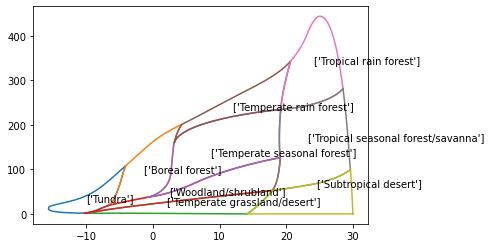

In [16]:
for b in Whittaker['biome_id'].unique():
    subplot = Whittaker[Whittaker['biome_id']==b]
    plt.plot(subplot['temp_c'], subplot['precp_cm'], '-')
    plt.text(subplot["temp_c"].mean(),subplot["precp_cm"].mean(),s=str(subplot["biome"].unique()))


Plot sPlotOpen in climate space:

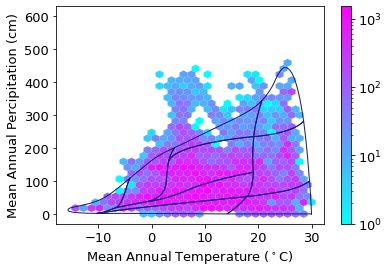

In [17]:
plt.rcParams.update({'font.size': 13})


ax1 = clim_sPlot.plot.hexbin(x='Temp', y='Perc', 
                            gridsize=30, 
                            extent=[-15,30,0,600], 
                            cmap="cool", 
                            mincnt=1, 
                            bins='log', 
                             sharex=False,
                             linewidths=0.1,
                             edgecolors=None
                            )

plt.xlabel("Mean Annual Temperature ($^\circ$C)")
plt.ylabel("Mean Annual Percipitation (cm)")

# add Whittaker biome line
for b in Whittaker['biome_id'].unique():
    subplot = Whittaker[Whittaker['biome_id']==b]
    plt.plot(subplot['temp_c'], subplot['precp_cm'], '-', color="midnightblue", linewidth=1)

plt.savefig('../Figures/sPlot_density_climate_space_tight.pdf', bbox_inches='tight')  

Plot iNaturalist observations in climate space:

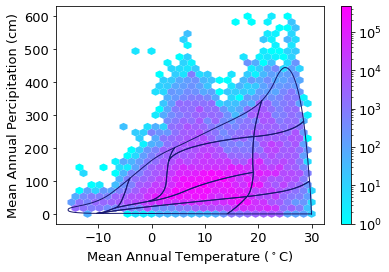

In [18]:
plt.rcParams.update({'font.size': 13})
ax2= clim_iNat.plot.hexbin(x='Temp', y='Perc', 
                           gridsize=30, 
                           extent=[-15,30,0,600], 
                           cmap="cool", 
                           mincnt=1, 
                           bins='log', 
                           sharex=False,
                          linewidths=0.1,
                             edgecolors=None)
plt.xlabel("Mean Annual Temperature ($^\circ$C)")
plt.ylabel("Mean Annual Percipitation (cm)")

# add Whittaker biome line
for b in Whittaker['biome_id'].unique():
    subplot = Whittaker[Whittaker['biome_id']==b]
    plt.plot(subplot['temp_c'], subplot['precp_cm'], '-', color="midnightblue", linewidth=1)

plt.savefig('../Figures/iNat_density_climate_space_tight.pdf', bbox_inches='tight')  